In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import holidays
from scipy.stats.mstats import winsorize
from scipy.stats import norm

In [2]:
with open("result.json", "r", encoding="utf-8") as f:
    data = json.load(f)

messages = [msg for msg in data["messages"] if msg["type"] == "message"]
df = pd.DataFrame(messages)

In [3]:
df

,id,type,date,date_unixtime,from,from_id,text,text_entities,edited,edited_unixtime,...,photo,photo_file_size,duration_seconds,poll,via_bot,location_information,reply_to_peer_id,inline_bot_buttons,title,media_spoiler
0,2,message,2024-08-14T11:50:01,1723625401,Victoria Karandey,user487064390,"Сейчас смотрите, что-то изменилось?","[{'type': 'plain', 'text': 'Сейчас смотрите, ч...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,message,2024-08-14T11:50:19,1723625419,Alisia,user1080532130,нет,"[{'type': 'plain', 'text': 'нет'}]",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,message,2024-08-14T11:50:25,1723625425,Roman Mexon,user1245628898,Закреп пропал,"[{'type': 'plain', 'text': 'Закреп пропал'}]",2024-08-14T11:50:37,1723625437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,message,2024-08-14T11:50:45,1723625445,Victoria Karandey,user487064390,"Странно, открыла историю чата)","[{'type': 'plain', 'text': 'Странно, открыла и...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,message,2024-08-14T11:50:52,1723625452,𓅭,user1323741617,Неа,"[{'type': 'plain', 'text': 'Неа'}]",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110882,111732,message,2025-05-11T22:29:01,1746991741,Черненко Михаил,user1155013365,Я пришёл.,"[{'type': 'plain', 'text': 'Я пришёл.'}]",2025-05-11T22:30:48,1746991848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110883,111733,message,2025-05-11T22:30:35,1746991835,jetset,user908927907,Молилась ли ты на ночь..,"[{'type': 'plain', 'text': 'Молилась ли ты на ...",2025-05-11T22:34:39,1746992079,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110884,111734,message,2025-05-11T22:31:16,1746991876,Luna,user1067651287,Ну все…,"[{'type': 'plain', 'text': 'Ну все…'}]",2025-05-11T22:32:43,1746991963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110885,111735,message,2025-05-11T22:31:29,1746991889,Alexander Evseev,user1493002170,Устрой дестрой,"[{'type': 'plain', 'text': 'Устрой дестрой'}]",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df["date"] = pd.to_datetime(df["date"])
df["from"] = df["from"].astype(str)

df["day"] = df["date"].dt.date
df["hour"] = df["date"].dt.hour
df["weekday"] = df["date"].dt.day_name()
df["month"] = df["date"].dt.to_period("M")

df.set_index("date", inplace=True)

In [5]:
df

,id,type,date_unixtime,from,from_id,text,text_entities,edited,edited_unixtime,reply_to_message_id,...,via_bot,location_information,reply_to_peer_id,inline_bot_buttons,title,media_spoiler,day,hour,weekday,month
date,,,,,,,,,,,,,,,,,,,,,
2024-08-14 11:50:01,2,message,1723625401,Victoria Karandey,user487064390,"Сейчас смотрите, что-то изменилось?","[{'type': 'plain', 'text': 'Сейчас смотрите, ч...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-14,11,Wednesday,2024-08
2024-08-14 11:50:19,3,message,1723625419,Alisia,user1080532130,нет,"[{'type': 'plain', 'text': 'нет'}]",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-14,11,Wednesday,2024-08
2024-08-14 11:50:25,4,message,1723625425,Roman Mexon,user1245628898,Закреп пропал,"[{'type': 'plain', 'text': 'Закреп пропал'}]",2024-08-14T11:50:37,1723625437,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-14,11,Wednesday,2024-08
2024-08-14 11:50:45,5,message,1723625445,Victoria Karandey,user487064390,"Странно, открыла историю чата)","[{'type': 'plain', 'text': 'Странно, открыла и...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-14,11,Wednesday,2024-08
2024-08-14 11:50:52,6,message,1723625452,𓅭,user1323741617,Неа,"[{'type': 'plain', 'text': 'Неа'}]",NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-08-14,11,Wednesday,2024-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-11 22:29:01,111732,message,1746991741,Черненко Михаил,user1155013365,Я пришёл.,"[{'type': 'plain', 'text': 'Я пришёл.'}]",2025-05-11T22:30:48,1746991848,111728.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-11,22,Sunday,2025-05
2025-05-11 22:30:35,111733,message,1746991835,jetset,user908927907,Молилась ли ты на ночь..,"[{'type': 'plain', 'text': 'Молилась ли ты на ...",2025-05-11T22:34:39,1746992079,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-11,22,Sunday,2025-05
2025-05-11 22:31:16,111734,message,1746991876,Luna,user1067651287,Ну все…,"[{'type': 'plain', 'text': 'Ну все…'}]",2025-05-11T22:32:43,1746991963,111732.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2025-05-11,22,Sunday,2025-05


# --- ИНФОГРАФИКА ---

<Axes: >

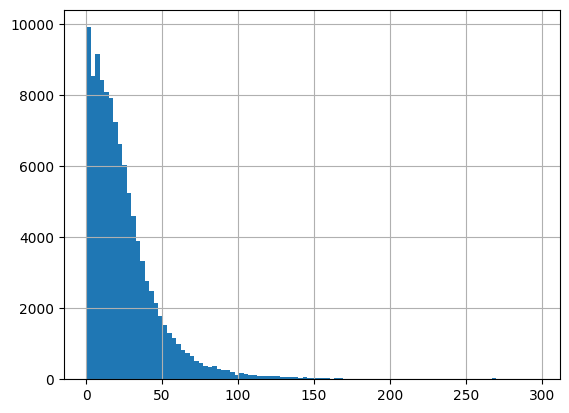

In [6]:
df['len_text'] = df['text'].apply(len)

df[df['len_text']<300]['len_text'].hist(bins=100)

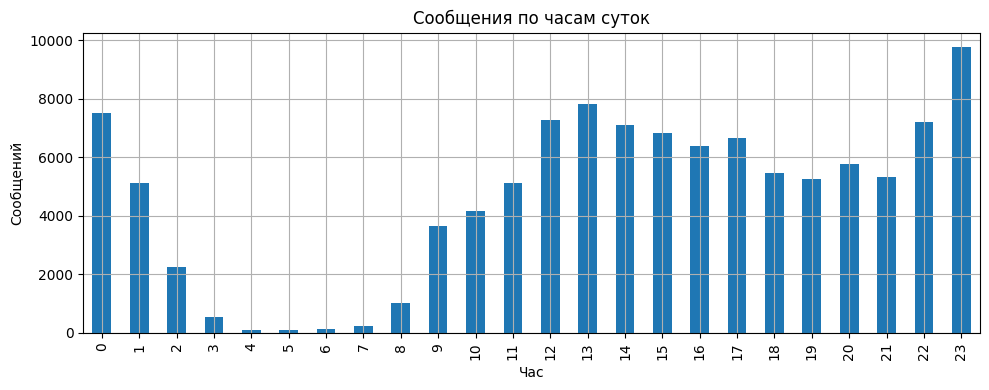

In [7]:
df_by_hour = df.groupby("hour").size()
plt.figure(figsize=(10, 4))
df_by_hour.plot(kind="bar")
plt.title("Сообщения по часам суток")
plt.xlabel("Час")
plt.ylabel("Сообщений")
plt.grid()
plt.tight_layout()
plt.show()

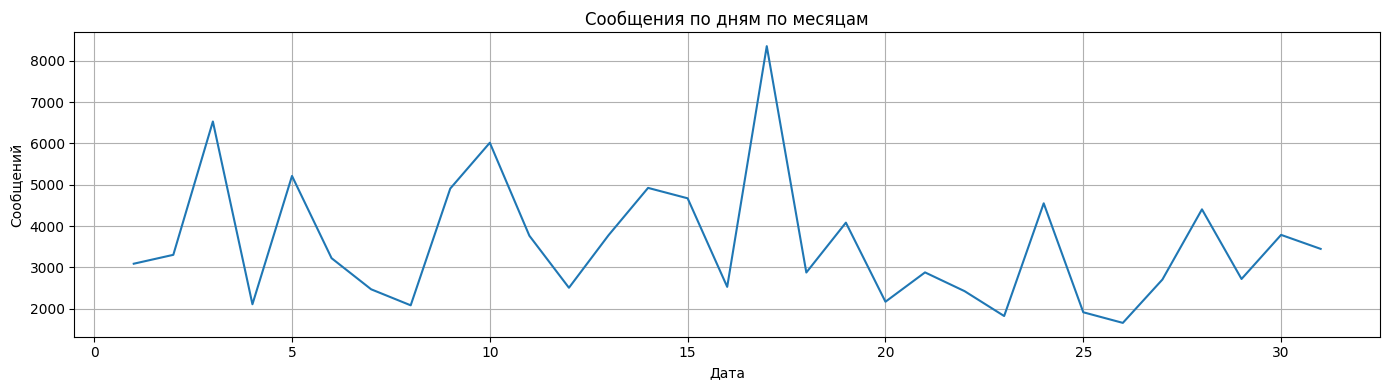

In [8]:
df['day_per_mounth'] = [i.day for i in df['day']]

df_by_day_per_mounth = df.groupby("day_per_mounth").size()
plt.figure(figsize=(14, 4))
df_by_day_per_mounth.plot()
plt.title("Сообщения по дням по месяцам")
plt.xlabel("Дата")
plt.ylabel("Сообщений")
plt.grid()
plt.tight_layout()
plt.show()

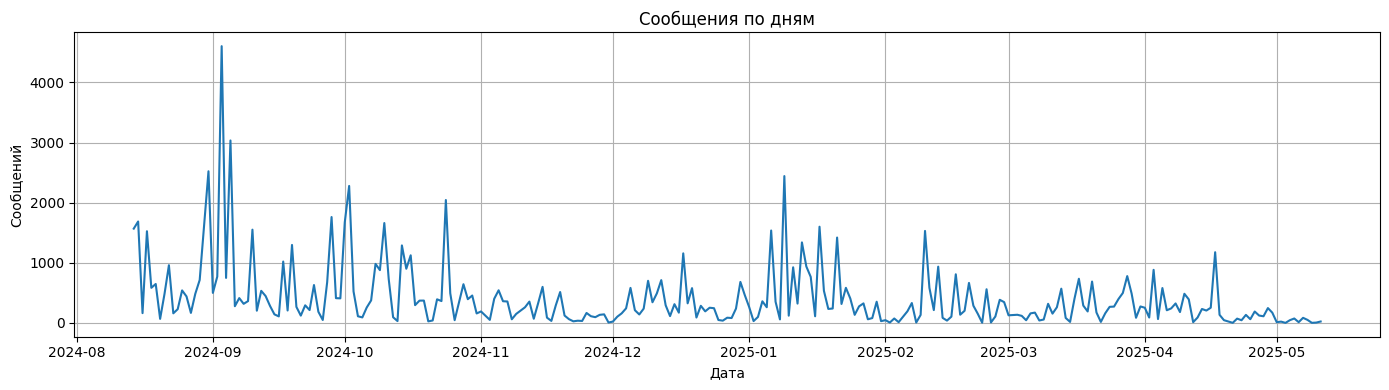

In [9]:
df_by_day = df.groupby("day").size()
plt.figure(figsize=(14, 4))
df_by_day.plot()
plt.title("Сообщения по дням")
plt.xlabel("Дата")
plt.ylabel("Сообщений")
plt.grid()
plt.tight_layout()
plt.show()

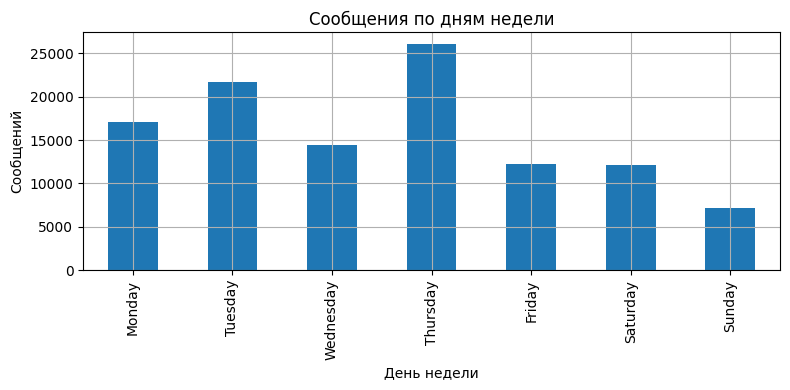

In [10]:
df_by_weekday = df.groupby("weekday").size().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])
plt.figure(figsize=(8, 4))
df_by_weekday.plot(kind="bar")
plt.title("Сообщения по дням недели")
plt.xlabel("День недели")
plt.ylabel("Сообщений")
plt.grid()
plt.tight_layout()
plt.show()

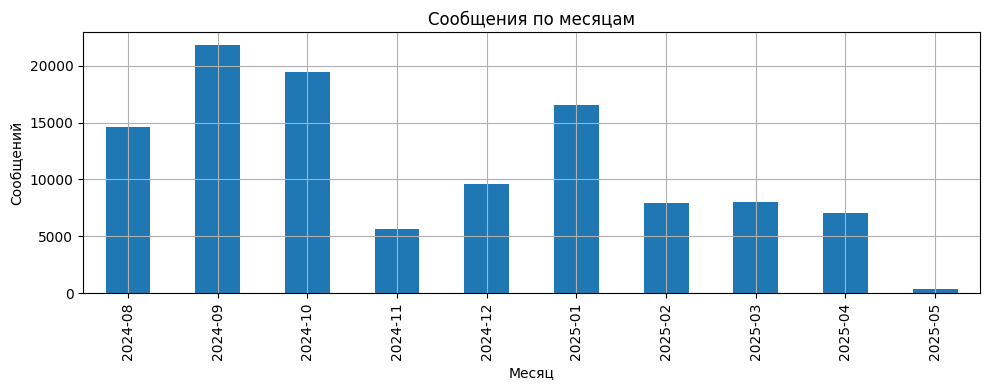

In [11]:

df_by_month = df.groupby("month").size()
plt.figure(figsize=(10, 4))
df_by_month.plot(kind="bar")
plt.title("Сообщения по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Сообщений")
plt.grid()
plt.tight_layout()
plt.show()

# --- СТАТИСТИКА ---

### Сообщения

In [13]:
top_day = df_by_day.idxmax()
top_day_count = df_by_day.max()
print(f"📅 Самый популярный день: {top_day} — {top_day_count} сообщений")

📅 Самый популярный день: 2024-09-03 — 4602 сообщений


In [14]:
top_sender = df["from"].value_counts().idxmax()
top_sender_count = df["from"].value_counts().max()
print(f"👤 Больше всего сообщений отправил: {top_sender} — {top_sender_count} сообщений")

👤 Больше всего сообщений отправил: 💜veronika💜 — 17444 сообщений


In [15]:
print("\n🏆 Топ-10 участников по числу сообщений:")
print(df["from"].value_counts().head(20))


🏆 Топ-10 участников по числу сообщений:
from
💜veronika💜           17444
kreywes              16850
Suren Mkoyan          6811
Константин Серпов     4629
𓅭                     4542
Пепел                 4528
Anastasia             4346
Kuznets_pol           2872
Larisa                2832
Мария Щепкина         2744
dariash               2382
lerrond               2336
mhsv                  2061
Arschlöcher           1952
irisha                1952
yunona                1935
Aleksandra            1898
meow                  1856
Анастасия             1542
лилия а.              1316
Name: count, dtype: int64


### Реакции

In [16]:
df["reactions_count"] = df["reactions"].apply(lambda r: sum([react.get("count", 1) for react in r]) if isinstance(r, list) else 0)
top_reacted = df.sort_values("reactions_count", ascending=False).head(10)

print("\n🔥 Самое залайканное сообщение:")
print(f"{top_reacted.iloc[0]['from']} — {top_reacted.iloc[0]['text']} — {top_reacted.iloc[0]['reactions_count']} реакций")


🔥 Самое залайканное сообщение:
yunona — ['ребята, поздравьте все, ', {'type': 'mention', 'text': '@vestmx'}, ' Мария перевелась на бюджет', {'type': 'custom_emoji', 'text': '🥳', 'document_id': 'video_files/sticker (154).webm'}, {'type': 'custom_emoji', 'text': '🥳', 'document_id': 'video_files/sticker (154).webm'}, {'type': 'custom_emoji', 'text': '🥳', 'document_id': 'video_files/sticker (154).webm'}, {'type': 'custom_emoji', 'text': '🥳', 'document_id': 'video_files/sticker (154).webm'}, {'type': 'custom_emoji', 'text': '🥳', 'document_id': 'video_files/sticker (154).webm'}, {'type': 'custom_emoji', 'text': '🥳', 'document_id': 'video_files/sticker (154).webm'}, ''] — 40 реакций


In [20]:
top_reacted

,id,type,date_unixtime,from,from_id,text,text_entities,edited,edited_unixtime,reply_to_message_id,...,inline_bot_buttons,title,media_spoiler,day,hour,weekday,month,len_text,day_per_mounth,reactions_count
date,,,,,,,,,,,,,,,,,,,,,
2025-03-18 22:29:11,99989,message,1742326151,yunona,user916597398,"[ребята, поздравьте все, , {'type': 'mention',...","[{'type': 'plain', 'text': 'ребята, поздравьте...",2025-03-18T22:30:09,1742326209,NaN,...,NaN,NaN,NaN,2025-03-18,22,Tuesday,2025-03,10,18,40
2024-11-22 18:17:30,61182,message,1732288650,dariash,user685179191,"[честь ЭМИТа отстояли, везём с , {'type': 'men...","[{'type': 'plain', 'text': 'честь ЭМИТа отстоя...",2024-11-22T18:17:35,1732288655,NaN,...,NaN,NaN,NaN,2024-11-22,18,Friday,2024-11,3,22,37
2025-01-13 17:32:15,78592,message,1736778735,lerrond,user395376021,успехов завтра всем на экзамене!,"[{'type': 'plain', 'text': 'успехов завтра все...",2025-01-13T17:32:17,1736778737,NaN,...,NaN,NaN,NaN,2025-01-13,17,Monday,2025-01,32,13,36
2025-01-19 12:41:59,83873,message,1737279719,лилия а.,user1130813864,ПРО ДИСКРУ:\n\n1. Вы приходите на экз десяткам...,"[{'type': 'plain', 'text': 'ПРО ДИСКРУ: 1. Вы...",2025-01-19T12:44:21,1737279861,NaN,...,NaN,NaN,NaN,2025-01-19,12,Sunday,2025-01,3197,19,32
2024-08-26 00:36:02,8761,message,1724621762,lerrond,user395376021,"[самокат - мое спасение, оч быстрая доставка (...","[{'type': 'plain', 'text': 'самокат - мое спас...",2024-08-26T00:40:42,1724622042,NaN,...,NaN,NaN,NaN,2024-08-26,0,Monday,2024-08,7,26,32
2024-11-05 18:41:06,57385,message,1730821266,dariash,user685179191,"бабашкин нам кота своего показал на семе, не з...","[{'type': 'plain', 'text': 'бабашкин нам кота ...",2024-11-05T18:56:42,1730822202,NaN,...,NaN,NaN,NaN,2024-11-05,18,Tuesday,2024-11,65,5,30
2025-03-19 19:12:50,100170,message,1742400770,Пепел,user1474213324,"[{'type': 'mention', 'text': '@Kuznets_pol'}, ...","[{'type': 'mention', 'text': '@Kuznets_pol'}, ...",2025-03-19T19:13:05,1742400785,NaN,...,NaN,NaN,NaN,2025-03-19,19,Wednesday,2025-03,2,19,29
2024-09-01 00:57:47,14757,message,1725141467,Максим Ляра,user463366124,"[Да, вроде неплохо встретились \nЧестно говоря...","[{'type': 'plain', 'text': 'Да, вроде неплохо ...",2024-09-01T00:58:36,1725141516,NaN,...,NaN,NaN,NaN,2024-09-01,0,Sunday,2024-09,3,1,28
2024-08-17 01:24:35,3861,message,1723847075,lerrond,user395376021,20 реакций на это сообщение и слив фоток федор...,"[{'type': 'plain', 'text': '20 реакций на это ...",2024-08-17T01:24:45,1723847085,NaN,...,NaN,NaN,NaN,2024-08-17,1,Saturday,2024-08,95,17,27


In [17]:
print("\n❤️‍🔥 Топ-10 сообщений по числу реакций:")
for i, row in top_reacted.iterrows():
    print(f"{row['from']} — {row['text'][:50]}... — {row['reactions_count']} реакций")


❤️‍🔥 Топ-10 сообщений по числу реакций:
yunona — ['ребята, поздравьте все, ', {'type': 'mention', 'text': '@vestmx'}, ' Мария перевелась на бюджет', {'type': 'custom_emoji', 'text': '🥳', 'document_id': 'video_files/sticker (154).webm'}, {'type': 'custom_emoji', 'text': '🥳', 'document_id': 'video_files/sticker (154).webm'}, {'type': 'custom_emoji', 'text': '🥳', 'document_id': 'video_files/sticker (154).webm'}, {'type': 'custom_emoji', 'text': '🥳', 'document_id': 'video_files/sticker (154).webm'}, {'type': 'custom_emoji', 'text': '🥳', 'document_id': 'video_files/sticker (154).webm'}, {'type': 'custom_emoji', 'text': '🥳', 'document_id': 'video_files/sticker (154).webm'}, '']... — 40 реакций
dariash — ['честь ЭМИТа отстояли, везём с ', {'type': 'mention', 'text': '@pzabudko'}, ' из Нижнего Новгорода золото х2🥇']... — 37 реакций
lerrond — успехов завтра всем на экзамене!... — 36 реакций
лилия а. — ПРО ДИСКРУ:

1. Вы приходите на экз десятками где-... — 32 реакций
lerrond — ['самокат - мое 

### Преподы

In [18]:
for i in df[['лужина' in str(i).lower() for i in df['text']]]['text']:
    print(i)
    print('-------')

Зато у вас по алгебре семинарист классный + Лужина
-------
Но Лужина более понятно семинары ведёт будто бы
Хотя на 1 семестре, возможно, это не будет ощущаться
Во всяком случае, по одним и тем же примерам и материалам
-------
А кто лучше Лужин или Лужина?
-------
Лужина
-------
а про лужина так то не знаем ничего
-------
Я была у Лужина ( сына). У Лужиной я была на одной паре ( по матанализу, алгебру не считаю) С Лужиным можно найти язык, главное его стопорить и спрашивать, что непонятно (Обязательно!!!). Он такой на приколе, рассказывает какие-то истории ( когда он это делал, я сама понимала, что мы сделали до этого)
Мама все разжевывает ( я такое не оч люблю чет), но она злючка в начале года конечно ( и двери запирает….)
Не знаю, кто лучше, конспекты(почти), материалы, кр и дз  одни и те же 
В основном, всем, кто не оч быстро схватывает, конечно, нравится Лужина
-------
Лужина л.м.?
-------
Лужина и один из лучших преподов англицкого
-------
Лужина вроде не воспринимает
-------
Ну кс

### Праздники

In [23]:
df_by_day = df.groupby("day").size().rename("count").reset_index()
df_by_day["day"] = pd.to_datetime(df_by_day["day"])
df_by_day["m_d"] = df_by_day["day"].dt.strftime('%m-%d')

In [24]:
day_stats = df_by_day.groupby("m_d")["count"].sum().reset_index()

q25, q50, q75 = np.percentile(day_stats["count"], [25, 50, 75])
mu = q50
robust_sigma = 0.7413 * (q75 - q25)

filtered = day_stats.query('(count > @mu - 5 * @robust_sigma) & (count < @mu + 5 * @robust_sigma)')

In [25]:
holidays_ru = pd.Series(holidays.RU(years=range(2000, 2025)))
holidays_ru.index = pd.to_datetime(holidays_ru.index).strftime('%m-%d')

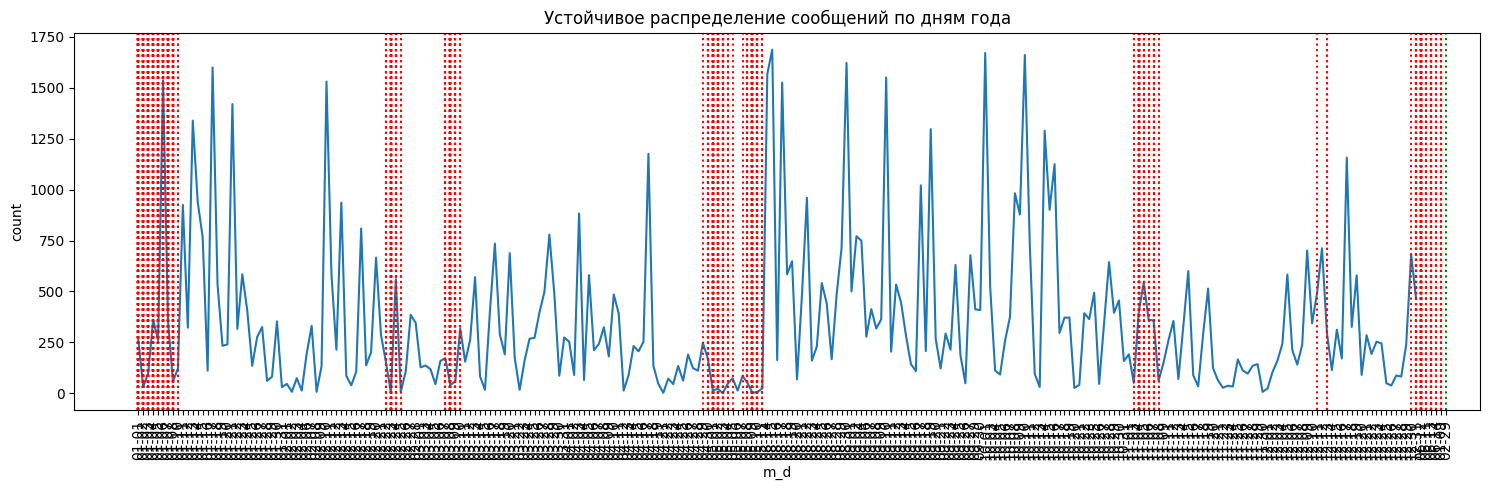

In [26]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=filtered, x="m_d", y="count")
[plt.axvline(x, color="red", linestyle=":") for x in holidays_ru.index]
plt.axvline('02-29', color="green", linestyle=":")
plt.title("Устойчивое распределение сообщений по дням года")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

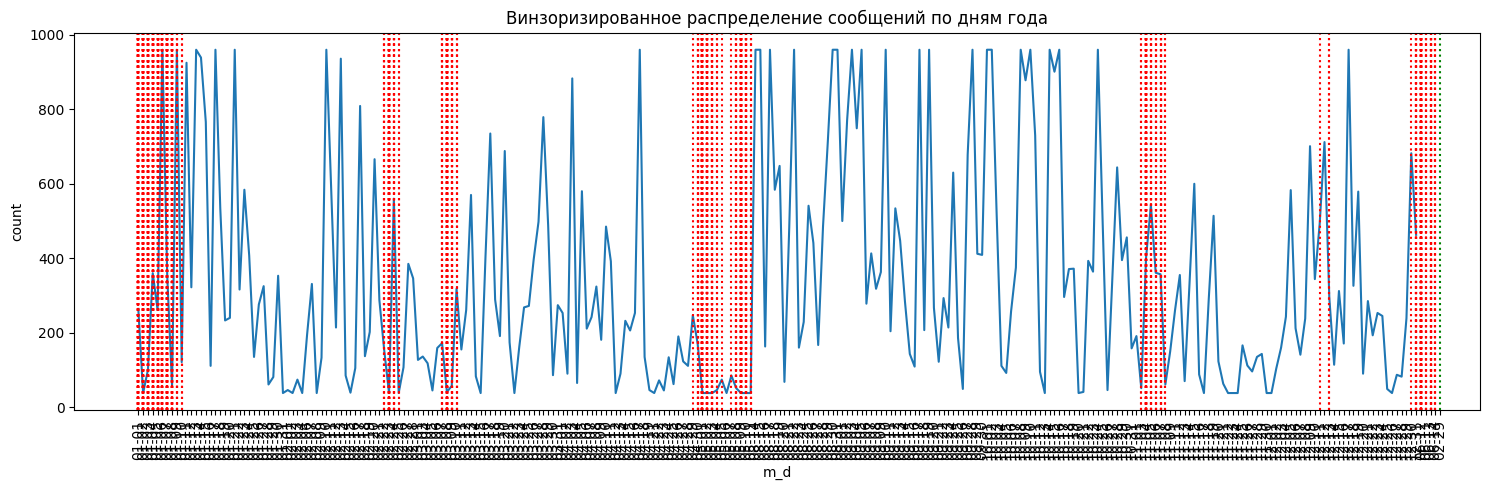

In [27]:
winsorized = day_stats.copy()
winsorized["count"] = winsorize(winsorized["count"], limits=[0.1, 0.1])

plt.figure(figsize=(15, 5))
sns.lineplot(data=winsorized, x="m_d", y="count")
[plt.axvline(x, color="red", linestyle=":") for x in holidays_ru.index]
plt.axvline('02-29', color="green", linestyle=":")
plt.title("Винзоризированное распределение сообщений по дням года")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()